In [1]:
# python -m pip install prophet
# conda install -c conda-forge prophet

!pip3 install yfinance -q --no-warn-script-location
# !conda install -c conda-forge yfinance
# !conda install conda-forge::yfinance

# conda install -c conda-forge frozendict


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip3 install yfinance
!pip install prophet


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt

c:\Users\student\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [ ]:
# 我特!
yahoo = yf.Ticker("TSLA").history(period="max")
yahoo.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<Axes: xlabel='Date'>

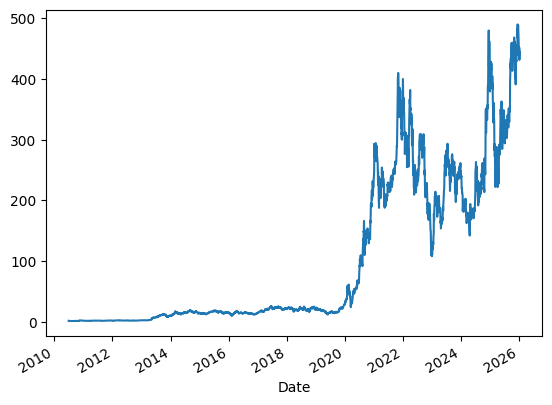

In [5]:
yahoo['Close'].plot()

In [6]:
yahoo.reset_index(inplace=True, drop=False)

In [7]:
yahoo.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3903,2026-01-05 00:00:00-05:00,447.989990,457.549988,444.570007,451.670013,67940800,0.0,0.0
3904,2026-01-06 00:00:00-05:00,446.380005,448.250000,428.779999,432.959991,89093800,0.0,0.0
3905,2026-01-07 00:00:00-05:00,435.899994,438.369995,431.290009,431.410004,59828800,0.0,0.0
3906,2026-01-08 00:00:00-05:00,427.890015,436.890015,424.369995,435.799988,57041100,0.0,0.0
3907,2026-01-09 00:00:00-05:00,435.950012,449.049988,430.390015,445.010010,67185700,0.0,0.0


In [8]:
df = yahoo[['Date', 'Close']].set_axis(['ds', 'y'], axis='columns')

In [9]:
df.head()

,ds,y
0,2010-06-29 00:00:00-04:00,1.592667
1,2010-06-30 00:00:00-04:00,1.588667
2,2010-07-01 00:00:00-04:00,1.464000
3,2010-07-02 00:00:00-04:00,1.280000
4,2010-07-06 00:00:00-04:00,1.074000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                           
---  ------  --------------  -----                           
 0   ds      3908 non-null   datetime64[ns, America/New_York]
 1   y       3908 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(1)
memory usage: 61.2 KB


In [11]:
df['ds'] = df['ds'].dt.tz_localize(None)